In [1]:
#Problema:
#Se intenta predecir: ¿Cuánto pagará una persona específica por un vehículo?

#5 Características: Age, Gender, Average miles driven per day, Personal debt, Monthly income -> 5 entradas
#Edad, Sexo, Promedio de millas recorridas por día, Deuda personal, Ingresos mensuales

#1 salida: Sales
#Venta

#Importación de librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import pickle
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.models import load_model, model_from_json
print('importadas')

importadas


In [2]:
# Funciones para guardar y cargar un Pipeline
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

#Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")   
    
def cargarNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')    
    print("Red Neuronal Cargada desde Archivo") 
    return model

In [8]:
#Carga de datos

#Variables
dataset = pd.read_csv('Regresion/cars.csv')
print(dataset.shape)
dataset.head()

#Variables
#dataset=np.loadtxt("Regresion/carsSinNombreVariables.csv", delimiter=",")
#dataset

(963, 6)


age  gender  miles   debt  income  sales
0   28       0     23      0    4099    620
1   26       0     27      0    2677   1792
2   30       1     58  41576    6215  27754
3   26       1     25  43172    7626  28256
4   20       1     17   6979    8071   4438

In [4]:
dataset.describe()
#la media de la salida "sales" es igual a 11689.860852

age      gender       miles          debt        income  \
count  963.000000  963.000000  963.000000    963.000000    963.000000   
mean    37.971963    0.512980   27.704050  14109.004154   6176.047767   
std     12.290838    0.500091   13.378181  18273.702481   3260.670142   
min     19.000000    0.000000   10.000000      0.000000      0.000000   
25%     27.000000    0.000000   20.000000   1475.000000   3506.500000   
50%     37.000000    1.000000   25.000000   6236.000000   6360.000000   
75%     49.000000    1.000000   32.000000  16686.000000   8649.500000   
max     60.000000    1.000000   97.000000  59770.000000  11970.000000   

              sales  
count    963.000000  
mean   11689.860852  
std     8986.896921  
min      500.000000  
25%     3554.000000  
50%     9130.000000  
75%    19245.000000  
max    29926.000000

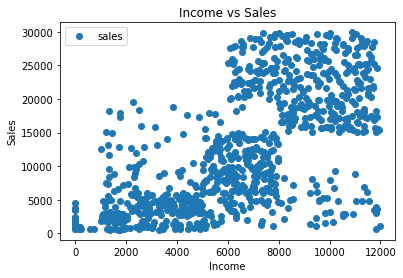

In [6]:
#Visualización para analisis manual
dataset.plot(x='income', y='sales', style='o')  
plt.title('Income vs Sales')  
plt.xlabel('Income')  
plt.ylabel('Sales')  
plt.show()

In [5]:
y=dataset['sales']
dataset=dataset.drop(['sales'], axis=1)
x=dataset
x.head()

age  gender  miles   debt  income
0   28       0     23      0    4099
1   26       0     27      0    2677
2   30       1     58  41576    6215
3   26       1     25  43172    7626
4   20       1     17   6979    8071

In [6]:
y=y.values

#Transformación de variables numéricas
#Normalización (0,1)
scaler_x = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
xscale

MinMaxScaler()


array([[0.2195122 , 0.        , 0.14942529, 0.        , 0.34243943],
       [0.17073171, 0.        , 0.1954023 , 0.        , 0.22364244],
       [0.26829268, 1.        , 0.55172414, 0.6955998 , 0.5192147 ],
       ...,
       [0.2195122 , 1.        , 0.20689655, 0.15579722, 0.22723475],
       [0.75609756, 0.        , 0.2183908 , 0.85900954, 0.72790309],
       [0.68292683, 1.        , 0.05747126, 0.06248954, 0.53517126]])

In [7]:
guardarPipeline(scaler_x,"transformadorMinMax")

In [8]:
#Split en train y test.
X_train, X_test, y_train, y_test = train_test_split(xscale, y, test_size=.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(770, 5)
(193, 5)
(770,)
(193,)


In [9]:
#Construcción del modelo de la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Las funciones de costo o pérdida son: mean_squared_error (mse) y mean_absolute_error (mae)
model.compile(loss='mae', optimizer='rmsprop', metrics=['mae'])

In [11]:
#Training y Validation
#150 epochs: 150 pasos de forward y backward
#Se muestra: training loss y validation loss
history = model.fit(X_train, y_train, epochs=50, batch_size=10,  verbose=1, validation_split=0.2)

Epoch 1/50
62/62 [==============================] - 3s 10ms/step - loss: 11781.7881 - mae: 11781.7881 - val_loss: 11942.9473 - val_mae: 11942.9473
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 11781.0166 - mae: 11781.0166 - val_loss: 11941.8779 - val_mae: 11941.8770
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 11779.6182 - mae: 11779.6182 - val_loss: 11940.1299 - val_mae: 11940.1299
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 11777.4912 - mae: 11777.4912 - val_loss: 11937.5830 - val_mae: 11937.5830
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 11774.4785 - mae: 11774.4785 - val_loss: 11934.1084 - val_mae: 11934.1084
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 11770.4951 - mae: 11770.4951 - val_loss: 11929.6064 - val_mae: 11929.6064
Epoch 7/50
62/62 [==============================] - 0s 6ms/step - loss: 11765.4385 - mae: 11765.4385 - val_loss: 11923.9316

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


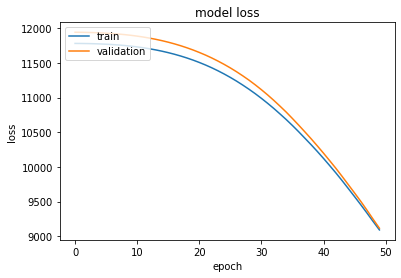

In [12]:
#Visualización de accuracy
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred=y_pred.flatten()# de 2D a 1D

In [14]:
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

dataframeFinal.head(10)

real   predicción
0    739  2734.589111
1  28608  4291.347656
2  29209  3872.421387
3   7427  3712.661865
4   4271  1837.139160
5   9952  3345.674561
6   2945  1509.853516
7   3640  3101.854248
8  24263  3727.866455
9  18892  3538.769287

In [15]:
from sklearn import metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

Mean Absolute Error (MAE): 8524.481
Mean Squared Error (MSE): 135622926.8616
Root Mean Squared Error (RMSE): 11645.7257


In [16]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print(model.metrics_names[1],score[1])

#Fase de Testing
score = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print(model.metrics_names[1],score[1])

Resultado en Train:
mae 9047.861328125
Resultado en Test:
mae 8524.4794921875


In [17]:
guardarNN(model,'redneuronalRegresion')

model2=cargarNN('redneuronalRegresion')

model2.summary()

Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Red Neuronal Cargada desde Archivo
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [18]:
score = model2.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print(model2.metrics_names[1],score[1])

#Fase de Testing
score = model2.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print(model2.metrics_names[1],score[1])

#1. Calcular la media de la variable de salida
#2. Calcular el 10% de la media del punto anterior
#3. Identificar si el RMSE es menor al valor del punto anterior

Resultado en Train:
mae 9047.861328125
Resultado en Test:
mae 8524.4794921875


Con respecto a RMSE
La media de venta: 11689.860852
el 10% es aprox: 1169

Buscamos que el error sea menor a 1169.